In [2]:
import cv2
import json
import numpy as np

import matplotlib.pyplot as plt


In [9]:
# calculate the center of mass of every frame

coms = {}
for i in range(6572):
    img = cv2.imread(f"frames/{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    # find com by taking average of black pixels
    x = 0
    y = 0
    count = 0
    for _i in range(thresh.shape[0]):
        for j in range(thresh.shape[1]):
            if thresh[_i, j] == 0:
                x += j
                y += _i
                count += 1
    if count == 0:
        coms[i] = (480, 360)
        print((480, 360))
        continue
    x /= count
    y /= count
    # i dunno why its off by 1
    coms[i] = (x + 1, y + 1)
    print((x +1, y + 1))

with open("centerofmasses.json", "w") as f:
    json.dump(coms, f)
    
    

(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(480.5, 360.5)
(479.48242534960093, 360.5397722247595)
(465.90581559055425, 361.9982024565432)
(455.23432623332616, 364.6773143836695)
(450.2839858037319, 362.24584340710436)
(450.75795087832586, 353.6914039398544)
(452.1371412846433, 349.05809097665104)
(431.18738809844587, 360.13609493295206)
(384.4281391967524, 363.3491144938374)
(352.3806067804999, 369.4743063598119)
(332.13383639480566, 373.6

Top, bottom, left, right: 
1 478 109 745
Percentages:  0.0020833333333333333 0.9958333333333333 0.12763466042154567 0.8723653395784543


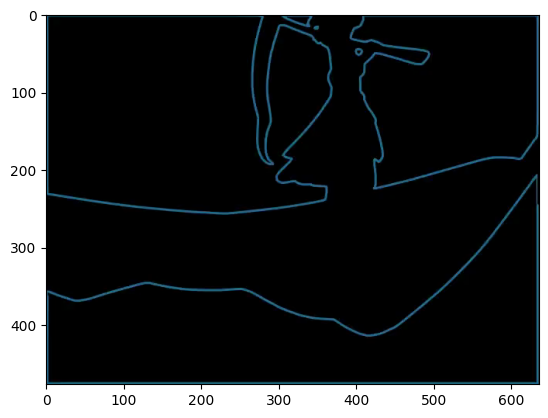

In [8]:
# calculate where the video is in the frame
img = cv2.imread("frame2203.png")

def crop_all_black_borders(image: np.ndarray):
    """
    The video rendered from main.py has black borders, use this function to crop them out for the integral calculus section
    """
    # i'm just gonna hardcode the values, because contouring was not working
    height = image.shape[0]
    width = image.shape[1]
    # find leftmost column that is not all black
    left = 0
    for i in range(width):
        if np.any(image[:, i] != 0):
            left = i + 7
            break
    # find rightmost column that is not all black
    right = width - 1
    for i in range(width - 1, -1, -1):
        if np.any(image[:, i] != 0):
            right = i - 8
            break
    # find topmost row that is not all black
    top = 0
    for i in range(height):
        if np.any(image[i] != 0):
            top = i + 1
            break
    # find bottommost row that is not all black
    bottom = height - 1
    for i in range(height - 1, -1, -1):
        if np.any(image[i] != 0):
            bottom = i -1
            break
    print("Top, bottom, left, right: ")
    print(top, bottom,left ,right)
    print("Percentages: ", top / height, bottom / height, left / width, right / width)
    return image[top:bottom, left:right]

img = crop_all_black_borders(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()